In [69]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

from funcs import load_stocks_dataframe
df = load_stocks_dataframe()
df = df.dropna()

In [59]:
df.head()

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
712,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
713,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
714,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
715,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
716,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839


In [70]:
#idx = pd.date_range(start="2003-04-01", end="2022-01-13")
#df.index = pd.DatetimeIndex(df.index)
df.index = pd.DatetimeIndex(df["Date"])

#df = df.reindex(idx, fill_value=0)
df

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
Date,,,,,,,,,,,,,,,,,
2003-04-01,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
2003-04-02,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
2003-04-03,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
2003-04-04,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
2003-04-07,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,2022-01-07,79.930000,-0.009664,158.410004,0.002658,1.771,0.021927,0.038,1.2643,-0.006444,-0.0082,2.78,0.003610,0.01,7.09654,0.039273,0.26817
2022-01-10,2022-01-10,79.989998,0.000751,157.820007,-0.003724,1.780,0.005082,0.009,1.2679,0.002847,0.0036,2.77,-0.003597,-0.01,7.09654,0.039273,0.26817
2022-01-11,2022-01-11,80.860001,0.010876,158.929993,0.007033,1.746,-0.019101,-0.034,1.2598,-0.006389,-0.0081,2.87,0.036101,0.10,7.09654,0.039273,0.26817


In [61]:
df.asfreq('B')

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
Date,,,,,,,,,,,,,,,,,
2003-04-01,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
2003-04-02,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
2003-04-03,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
2003-04-04,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
2003-04-07,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,2022-01-07,79.930000,-0.009664,158.410004,0.002658,1.771,0.021927,0.038,1.2643,-0.006444,-0.0082,2.78,0.003610,0.01,7.09654,0.039273,0.26817
2022-01-10,2022-01-10,79.989998,0.000751,157.820007,-0.003724,1.780,0.005082,0.009,1.2679,0.002847,0.0036,2.77,-0.003597,-0.01,7.09654,0.039273,0.26817
2022-01-11,2022-01-11,80.860001,0.010876,158.929993,0.007033,1.746,-0.019101,-0.034,1.2598,-0.006389,-0.0081,2.87,0.036101,0.10,7.09654,0.039273,0.26817


In [71]:
df = df.asfreq('B')
df.index

DatetimeIndex(['2003-04-01', '2003-04-02', '2003-04-03', '2003-04-04',
               '2003-04-07', '2003-04-08', '2003-04-09', '2003-04-10',
               '2003-04-11', '2003-04-14',
               ...
               '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', name='Date', length=4903, freq='B')

In [72]:
df = df.fillna(method="ffill")

In [73]:
df.isna().sum()

Date                          0
GrowthStock_AdjClose          0
GrowthStock_PercentChange     0
ValueStock_AdjClose           0
ValueStock_PercentChange      0
Treasury10yr_AdjClose         0
Treasury10yr_PercentChange    0
Treasury10yr_Diff             0
exchange                      0
exchange_PercentChange        0
exchange_Diff                 0
inflation5yr                  0
inflation5yr_PercentChange    0
inflation5yr_Diff             0
CPI                           0
CPI_PercentChange             0
CPI_Diff                      0
dtype: int64

In [7]:
df.iloc[-1]

Date                          2022-01-13 00:00:00
GrowthStock_AdjClose                    79.220001
GrowthStock_PercentChange               -0.024985
ValueStock_AdjClose                    158.770004
ValueStock_PercentChange                -0.001823
Treasury10yr_AdjClose                       1.711
Treasury10yr_PercentChange              -0.008116
Treasury10yr_Diff                          -0.014
exchange                                   1.2482
exchange_PercentChange                   -0.00152
exchange_Diff                             -0.0019
inflation5yr                                 2.77
inflation5yr_PercentChange               -0.01773
inflation5yr_Diff                           -0.05
CPI                                       7.09654
CPI_PercentChange                        0.039273
CPI_Diff                                  0.26817
Name: 2022-01-13 00:00:00, dtype: object

In [83]:
recency = -500
y_train = df.iloc[:recency]["GrowthStock_AdjClose"]
y_test  = df.iloc[recency:]["GrowthStock_AdjClose"]
y_train.shape, y_test.shape

((4403,), (500,))

In [84]:
m = y_train.mean()
time = y_train.index

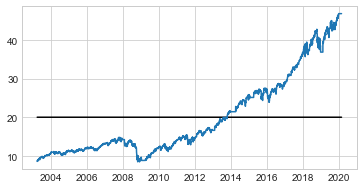

In [85]:
fig, ax = plt.subplots(1, figsize = (6, 3))
ax.plot(time, np.ones(len(time))*m, label = "reference", color = "black")
ax.plot(y_train, label = "Growth Stock Price")

### Time Series Decomposition

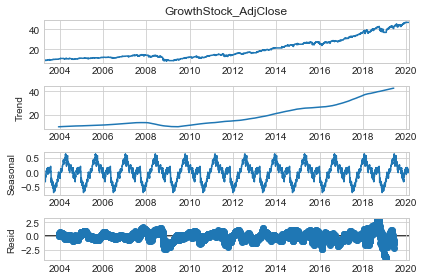

In [87]:
decomposition = sm.tsa.seasonal_decompose(y_train, model='additive', period = 360)
fig = decomposition.plot()

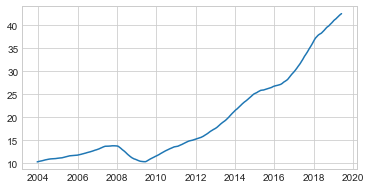

In [88]:
trend = decomposition.trend
time = trend.index
m = decomposition.trend.mean()
fig, ax = plt.subplots(1, figsize = (6,3))
ax.plot(trend, label = 'trend')

### Time Series Forecasting

In [101]:
order = (1, 3, 3)
seasonal_order = (0, 1, 1, 5)
model = sm.tsa.SARIMAX(y_train, order = order, seasonal_order = seasonal_order)
fit = model.fit()
print(fit.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46917D-01    |proj g|=  1.49228D+00

At iterate    5    f=  1.85866D-03    |proj g|=  2.99146D-01

At iterate   10    f= -1.72400D-01    |proj g|=  7.89142D-02

At iterate   15    f= -2.23345D-01    |proj g|=  6.35915D-02

At iterate   20    f= -2.23489D-01    |proj g|=  3.65673D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23    123      3     0     0   3.408D-02  -2.235D-01
  F = -0.22348942290357973     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                      SARIMAX Results                                      
Dep. Variable:                GrowthStock_AdjClose   No. Observations:                 4403
Model:             SARIMAX(1, 3, 3)x(0, 1, [1], 5)   Log Likelihood                 984.024
Date:                             Sun, 06 Mar 2022   AIC                          -1956.048
Time:                                     01:06:16   BI

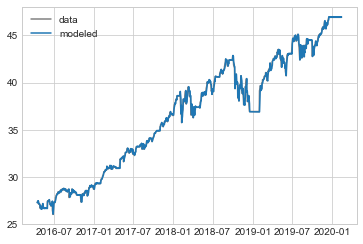

In [102]:
# prediction on training data
train_preds = fit.get_prediction().predicted_mean

recency = -1000

plt.plot(y_train[recency:], color = "grey", label = "data")
plt.plot(train_preds[recency:], zorder = 10, label = "modeled")
plt.legend()

In [38]:
print(y_test.index.values[0], y_test.index.values[-1])

2018-02-20T00:00:00.000000000 2022-02-07T00:00:00.000000000


In [39]:
type(y_test.index.values[0])

numpy.datetime64

In [40]:
from datetime import datetime
start_day = np.datetime_as_string(y_test.index.values[0], unit='D')
start_day

'2018-02-20'

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


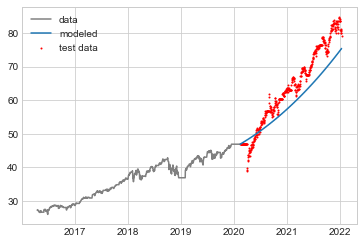

In [103]:
# prediction on test data
test_preds = fit.get_prediction(start = y_test.index.values[0],
                                  end = y_test.index.values[-1])

test_preds = test_preds.predicted_mean

recency = -1000

plt.plot(y_train[recency:], color = "grey", label = "data")
plt.scatter(y_test.index.values, y_test, color = "red", label = "test data", s = 1)
plt.plot(test_preds, zorder = 10, label = "modeled")
plt.legend()

### Model Selection

In [104]:
# loss function
fit.aic

-1956.047858088923

In [105]:
def test_MSE(fit, y_test):
    
    test_preds = fit.get_prediction(start = y_test.index.values[0], 
                                    end  = y_test.index.values[-1])
    test_preds = test_preds.predicted_mean
    
    return ((y_test - test_preds)**2).mean()

In [106]:
test_MSE(fit, y_test)

34.89528604418529

In [ ]:
from itertools import product
a = range(0, 5)

best_order = (0, 0, 0)
best_MSE   = np.inf
for order in product(a, a, a):
    model = sm.tsa.SARIMAX(y_train, order = order, seasonal_order = seasonal_order)
    fit = model.fit(verbose = False)
    MSE = test_MSE(fit, y_test)
    if MSE < best_MSE:
        print("Found MSE " + str(round(MSE, 2)) + " with order " + str(order))
        best_MSE = MSE
        best_order = order
        best_model = model  

### ARIMA Model 